Title:- Capstone using IMDB movie Rating analysis using Python.
Date:- 03/27/2018
Author:-  Amit Shinde
Instrutor:- Professor Sharat Chikkerur
Term:-Summer 2017 CPS Quarter

Introduction:- Movie Ratings Data is already downloaded from Kaggle and store in the local working directory. We will be analyzing IMDB movie dataset for this project. The dataset includes film, genre, ratings, budget and year of release. It has a lot of information to analyze and perform correlation analysis to see if any variables are related to each other.

In [33]:
# Importing packages
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Get working directory
os.getcwd()

'/Users/Amit/Documents/Master/Universities/Northeastern/Courses/ALY 6983 Python tools for Data Science/Week 6'

In [4]:
# Store contents of Movie-Ratings.csv in movies variable
movies = pd.read_csv("Movie-Ratings.csv")

In [5]:
# Display first few rows
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
# Display movie Columns
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [7]:
#Change movie Columns
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions' , 'Year']

In [8]:
# Display movie Columns with new names
movies.columns

Index(['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions',
       'Year'],
      dtype='object')

In [9]:
# Display first few rows
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [18]:
# listing genre categories
movies.Genre = movies.Genre.astype('category')
movies.Genre.cat.categories


Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

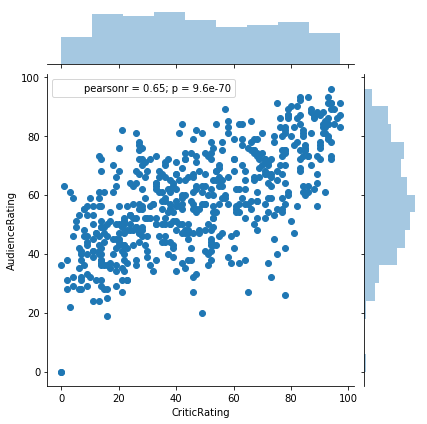

In [20]:
#Audience vs Critic ratings
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

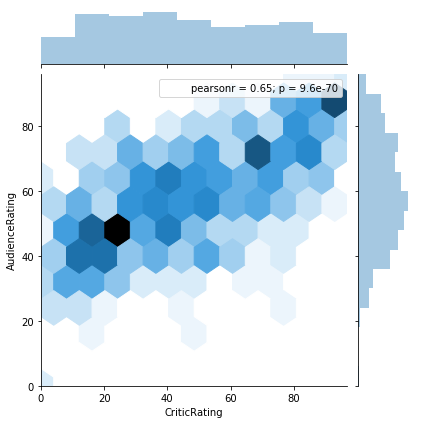

In [21]:
# Audience vs Critic ratings with grouping.
j = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating',  kind='hex') 

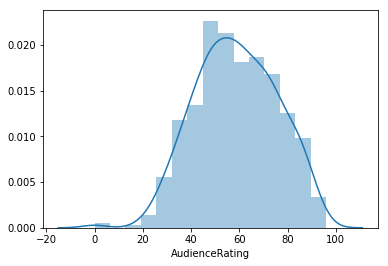

In [23]:
# Histogram of Audience rating with bins
ml1 = sns.distplot(movies.AudienceRating, bins=15)

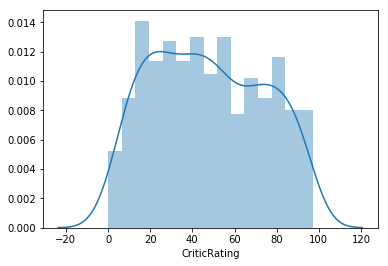

In [48]:
# Histogram of Critic rating with bins
ml2 = sns.distplot(movies.CriticRating, bins=15)

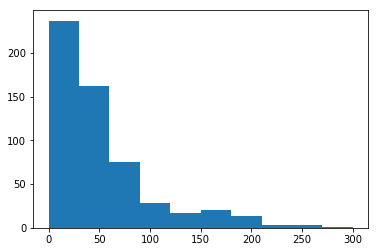

In [49]:
# Histogram of Budget in millions
h1 = plt.hist(movies.BudgetMillions)

([array([  9.,  39.,  24.,  13.,  16.,   9.,   8.,  14.,   5.,   4.,   8.,
           2.,   2.,   0.,   1.]),
  array([ 48.,  80.,  35.,  19.,  18.,  10.,   8.,  15.,   5.,   4.,   8.,
           2.,   2.,   0.,   1.]),
  array([ 52.,  94.,  39.,  24.,  20.,  14.,   9.,  16.,   5.,   5.,   8.,
           2.,   2.,   0.,   1.])],
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.]),
 <a list of 3 Lists of Patches objects>)

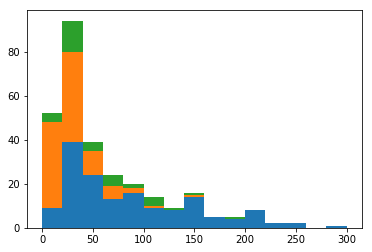

In [50]:
# Stacked Histogram of Action, Drama and Thriller movies budget
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, 
          movies[movies.Genre == 'Drama'].BudgetMillions,
         movies[movies.Genre == 'Thriller'].BudgetMillions], bins = 15, stacked = True)

In [51]:
# Printing all movies genre
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


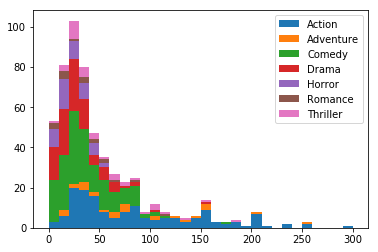

In [52]:
# Plotting stacked histogram for all genre with legend
list1 = list()
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
h = plt.hist(list1, bins = 30, stacked = True, label = mylabels)
plt.legend()
plt.show()

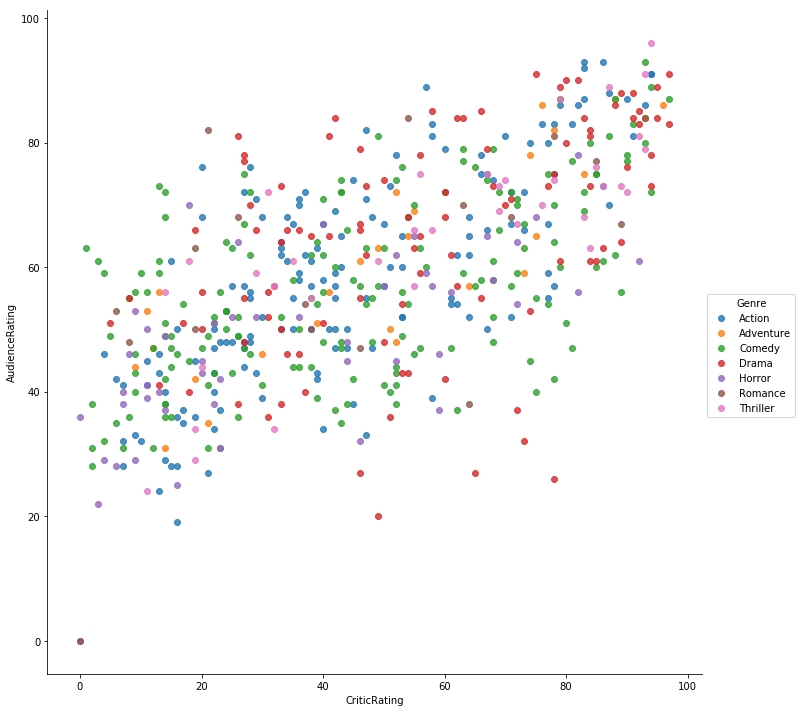

In [53]:
# KDE plot - Kernel Density Estimate plot for Critic vs Audience Rating
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre', size = 10, aspect = 1)

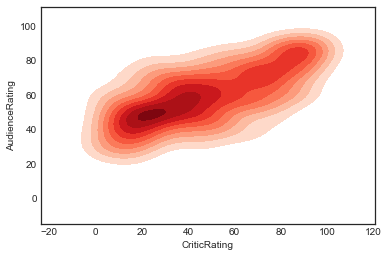

In [146]:
# Density KDE plot
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')

[(-20, 160)]

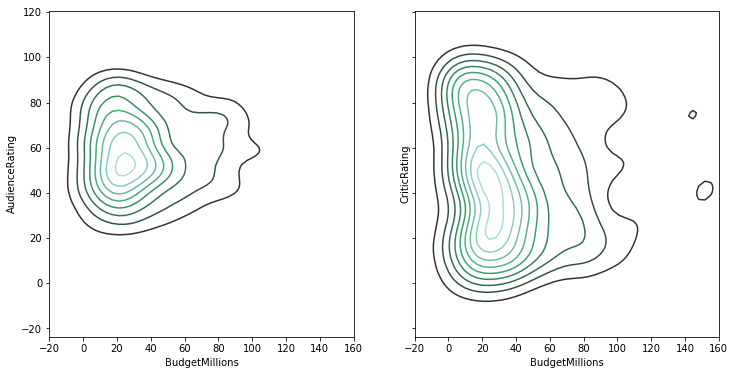

In [56]:
# KDE plot of Budget in millions against Critic and Audience Rating
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))

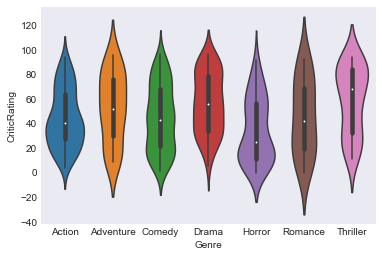

In [158]:
#Violin Plots
z = sns.violinplot(data=movies, x='Genre', y='CriticRating')

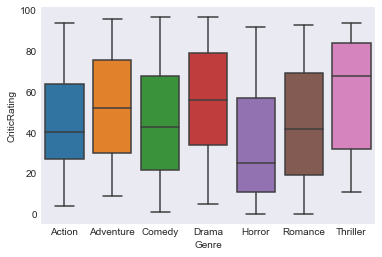

In [159]:
w = sns.boxplot(data=movies, x='Genre', y='CriticRating')

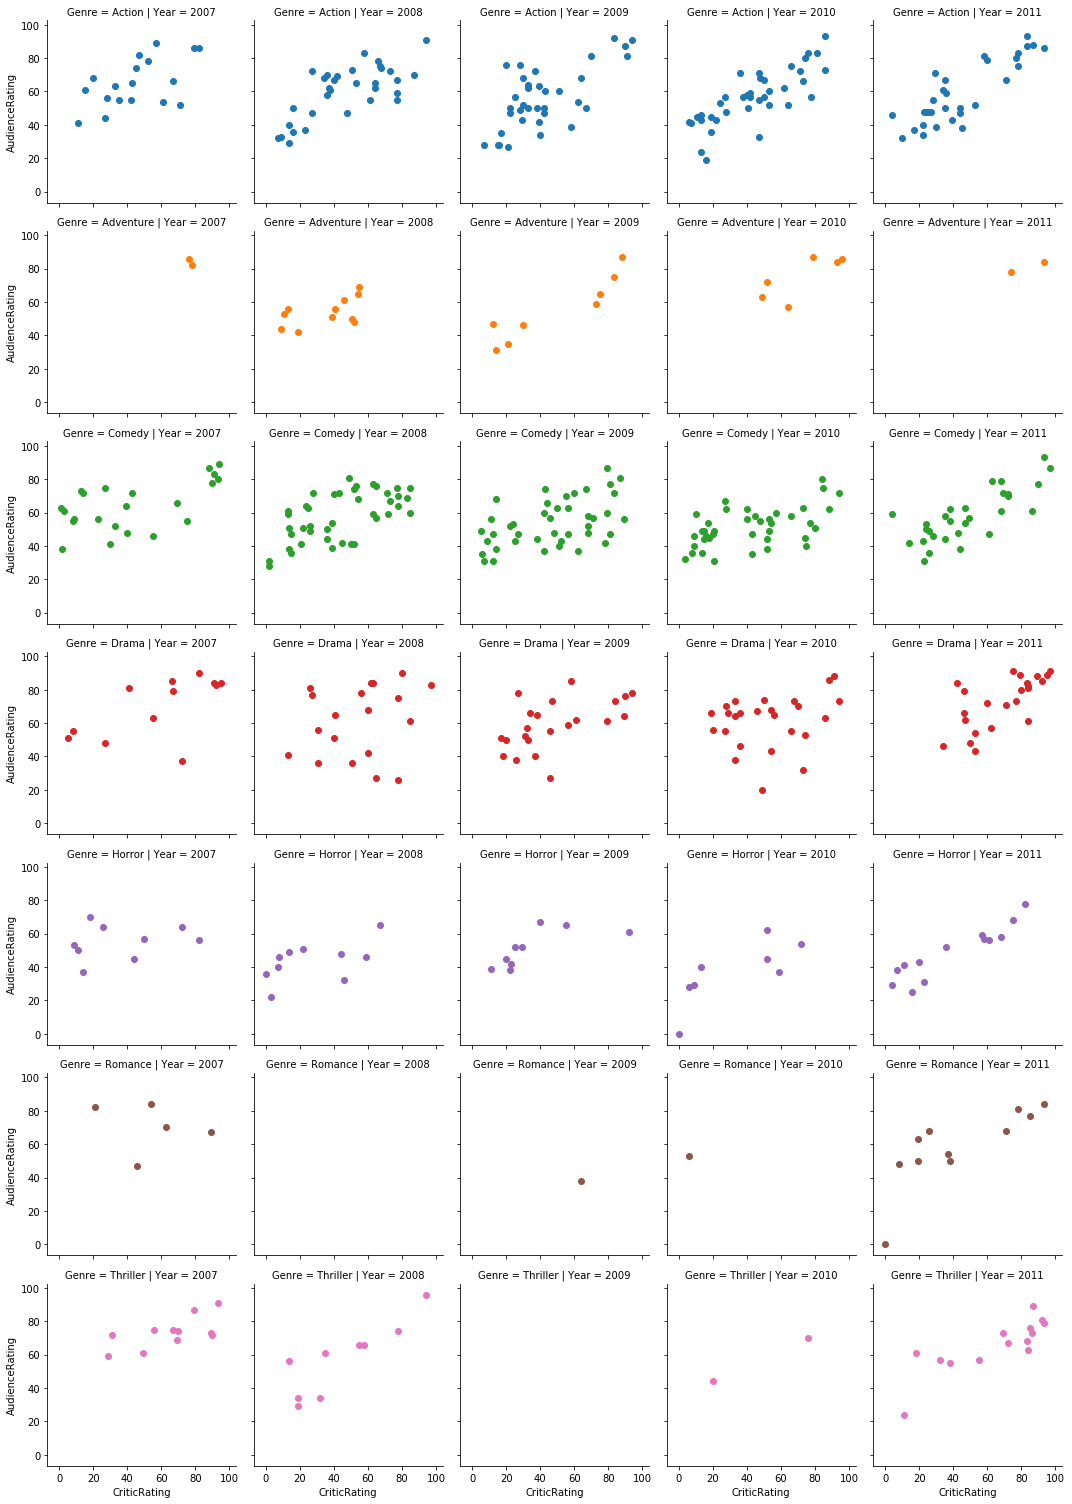

In [57]:
# Creating a Facet Grid scatter plot
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

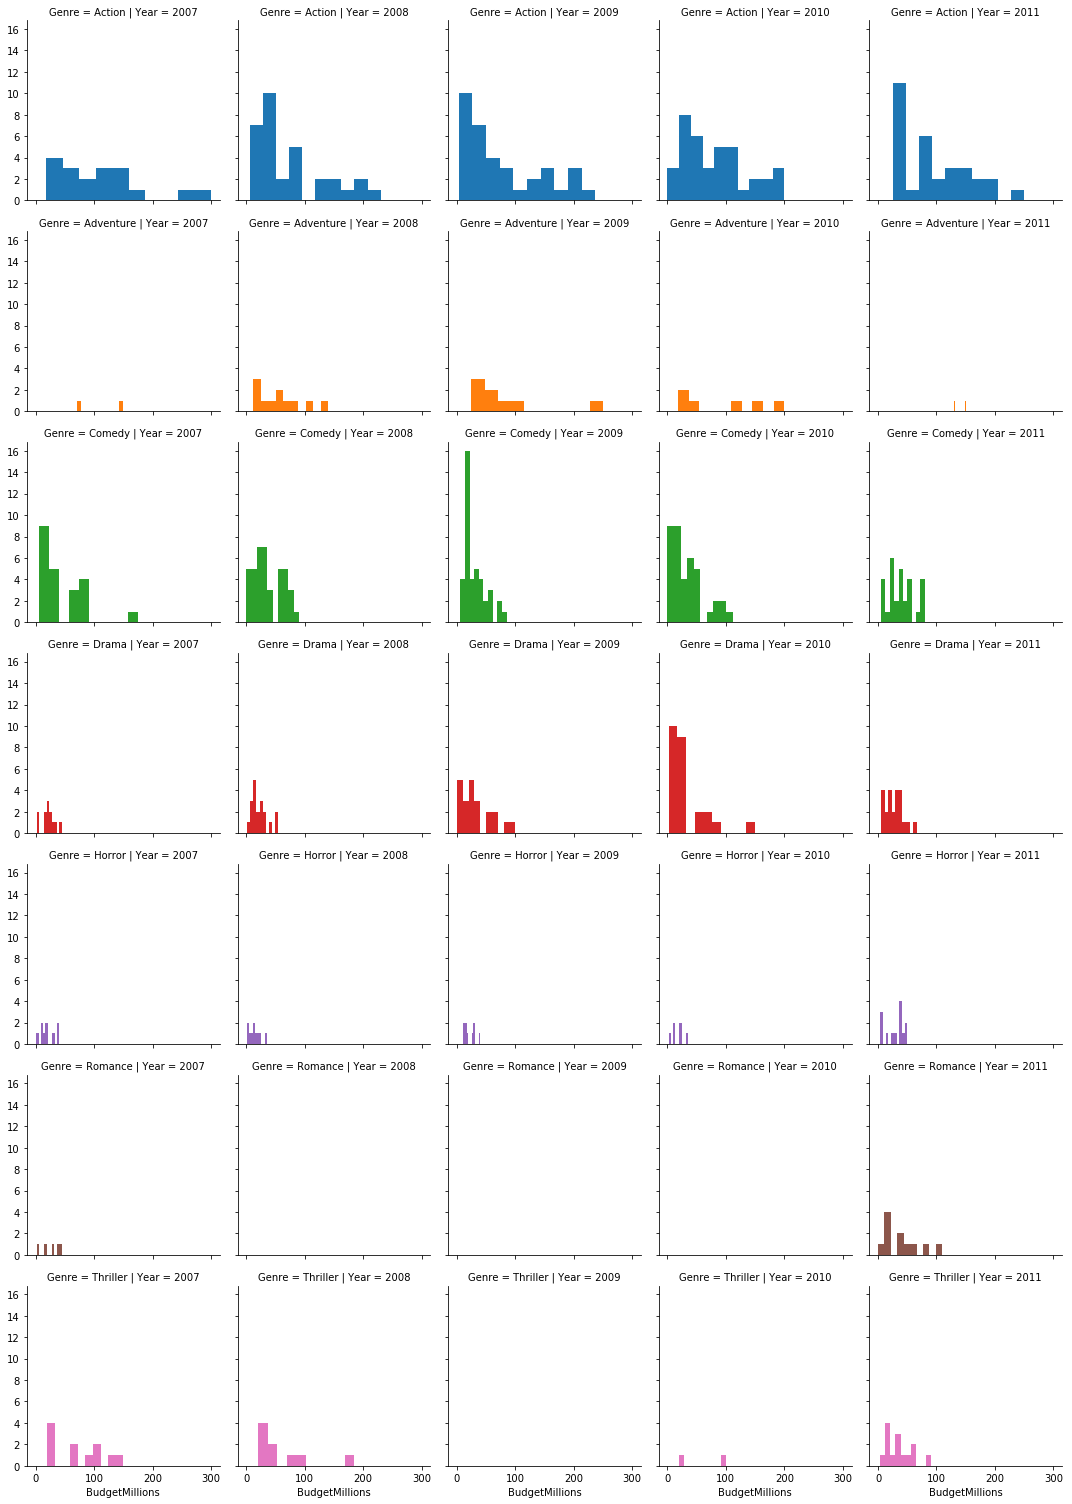

In [58]:
# Creating a Facet Grid histogram 
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

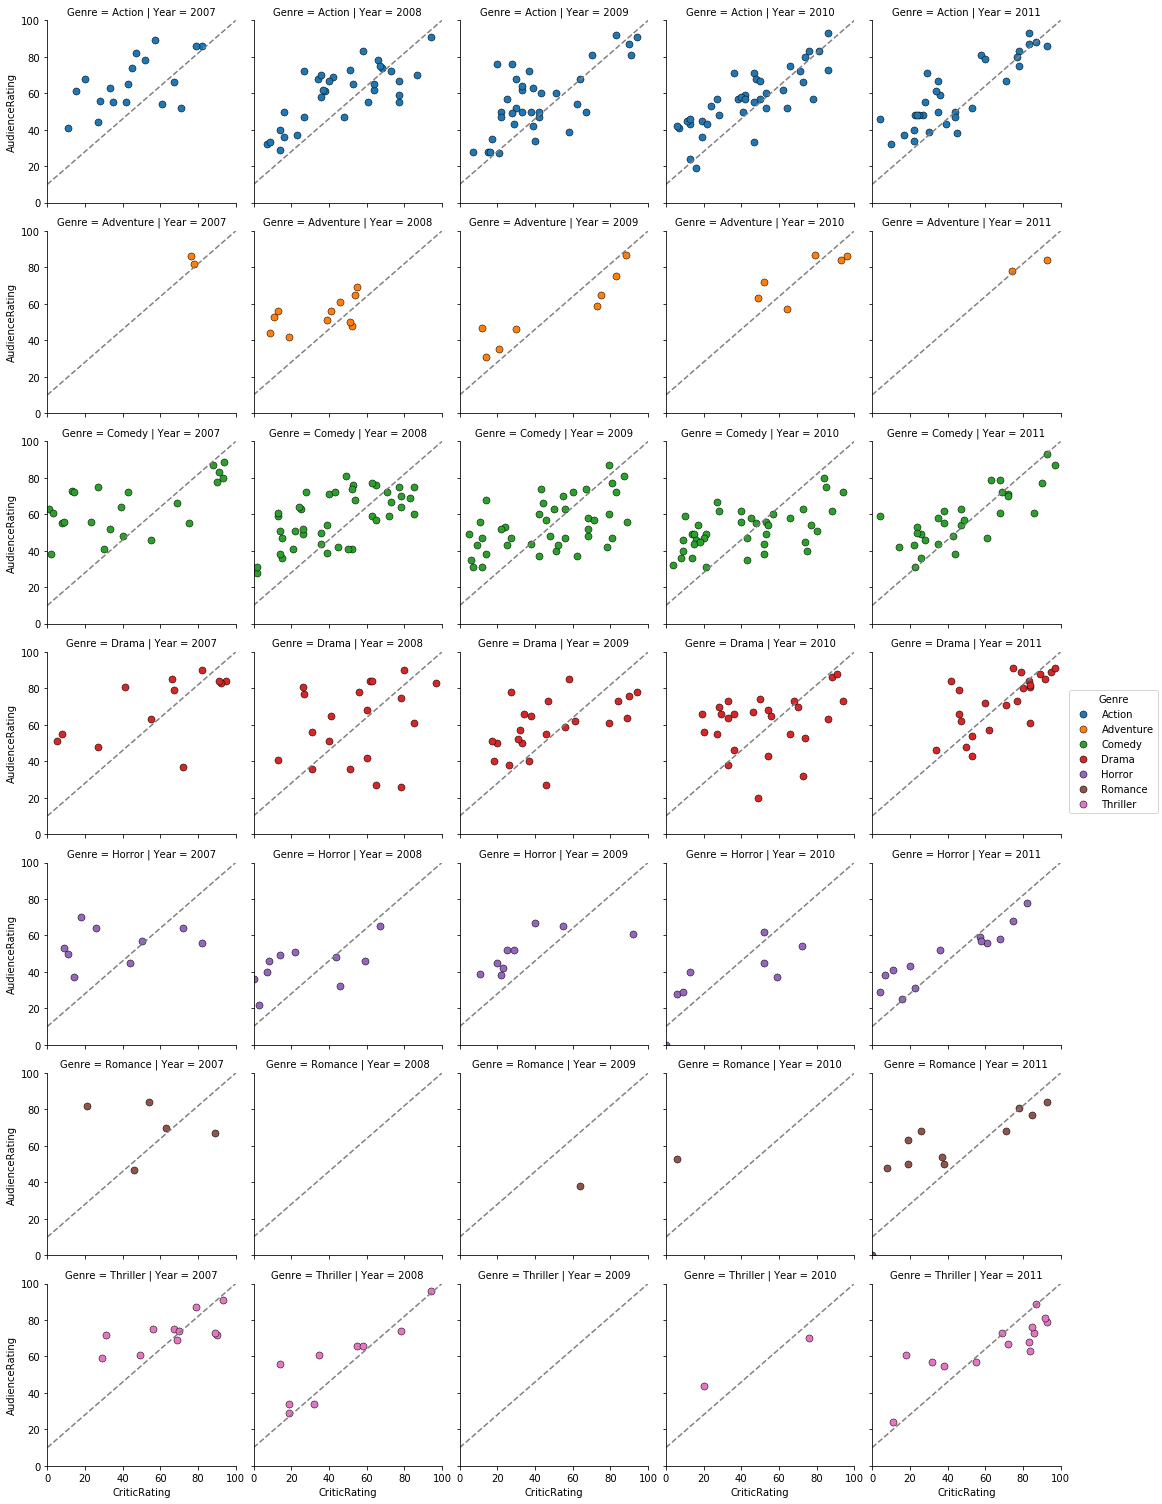

In [60]:
# Controling Axes and Adding Diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(10,100), c="gray", ls="--")
g.add_legend()    

In [168]:
#<<< Chart #5

In [169]:
# Building Dashboards

In [170]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

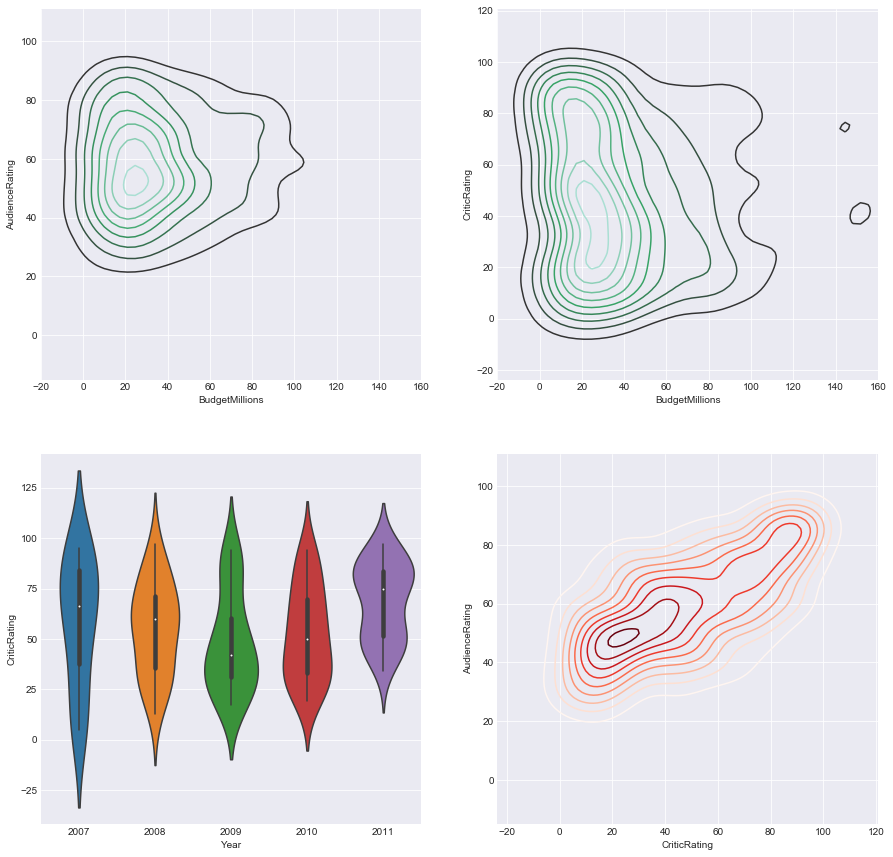

In [171]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2,2,figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
z1 = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=axes[1,0])
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds', ax=axes[1,1])

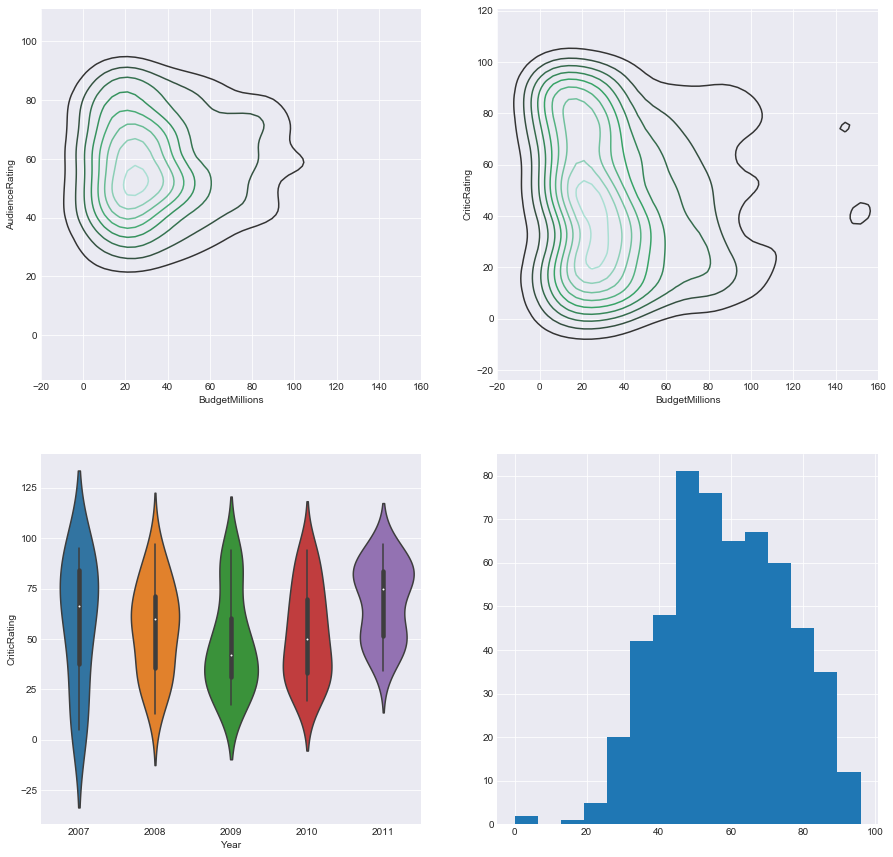

In [172]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2,2,figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])
k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
z1 = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=axes[1,0])
axes[1,1].hist(movies.AudienceRating, bins = 15)
plt.show()

In [173]:
#Styling Dashboards

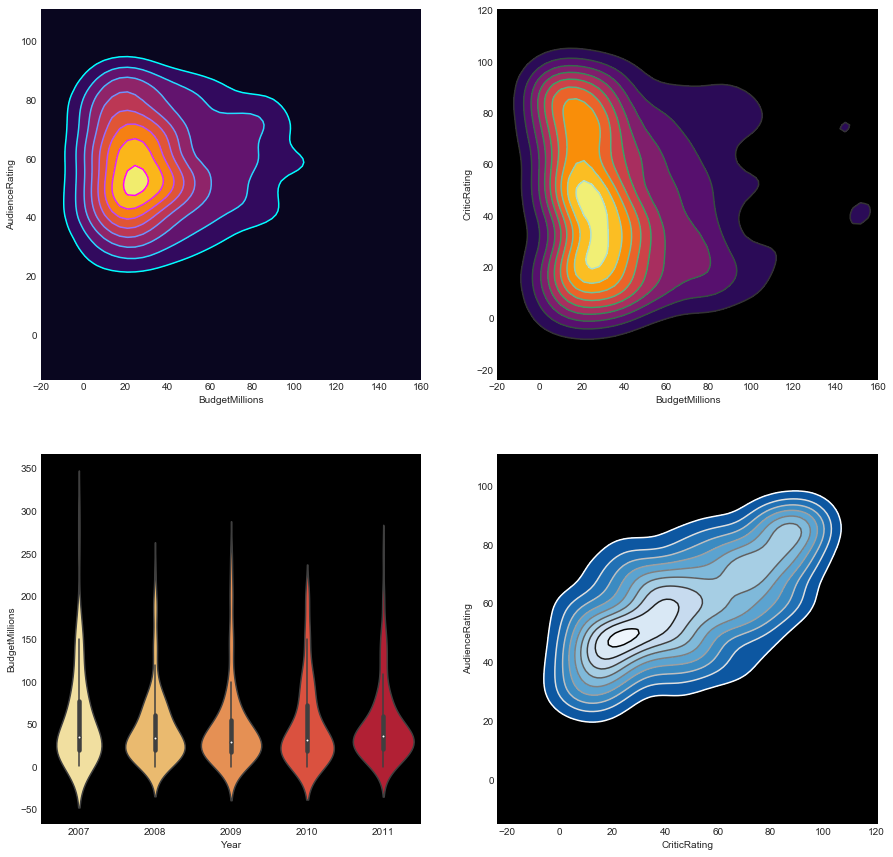

In [61]:
sns.set_style("dark", {"axes.facecolor":"black"})
f, axes = plt.subplots(2,2,figsize=(15,15))
#Plot [0,0]
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade=True, shade_lowest=True, cmap='inferno', ax=axes[0,0])
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap='cool', ax=axes[0,0])
#Plot [0,1]
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating,shade=True, shade_lowest=False, cmap='inferno', ax=axes[0,1])
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])

#Plot [1,0]
z = sns.violinplot(data=movies, x='Year', y='BudgetMillions', ax=axes[1,0], palette='YlOrRd')

#Plot [1,1]
k4 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[1,1])

k4b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='gist_gray_r', ax=axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

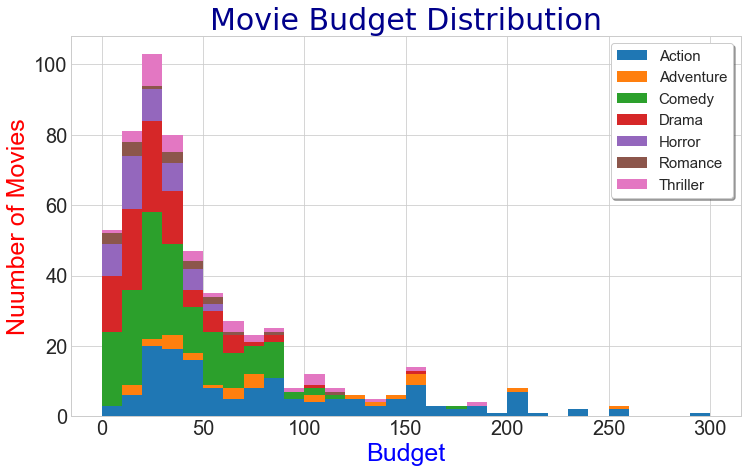

In [62]:
# Movie budget Distributions
mylabels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12,7)
h = plt.hist(list1, bins = 30, stacked = True, label = mylabels)
plt.title("Movie Budget Distribution", fontsize=30, color="DarkBlue", fontname="TimesNewRoman")
plt.ylabel("Nuumber of Movies", fontsize=25, color="Red")
plt.xlabel("Budget", fontsize=25, color="Blue")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=15, frameon = True, shadow = True, framealpha = 1)
plt.show()

Conclusion:- 
In this project, we saw how to analyze raw data and make a meaning out of it to answer some of the business problem questions. The raw dataset was cleansed in many ways to extract good information. Columns were converted into more meaning to work with. The genre was split by ‘unique genre’ that increased the total records. We saw that the audience ratings and critic ratings are correlated at extreme spectrum but not in middle. After filtering data, we were able to identify the big budget movies. We also saw budget distribution among genres. 
    Most of the time was spent in Data Cleansing which corresponds to 70% of the work of a Data Scientist. In this project, it would be business who will have questions for which they need answers by the Data Scientist.  We saw how powerful Python could be to find insights of data to make better decisions for the future.